In [1]:
import os
# import sys
# import csv
#import ast
import json
from datetime import datetime
# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
plt.rcParams.update({'font.size': 14})

In [2]:
def mylistdir(directory):
    filelist = os.listdir(directory)
    return [x for x in filelist if not (x.startswith('.') or 'Icon' in x)]  

def get_date_folders(path):
    date_folders = mylistdir(path)
    date_folders.sort()
    day = date_folders[0]
    return date_folders


def read_in_data(path, day, measurements):
    with open(path, 'r') as f:
        
        try:
            data_dicts = json.loads(f.read())
            for time_point in data_dicts:
                
                for measure in time_point:
                    measurements[measure].append(time_point[measure])
        except Exception as e:
            print('error: {}'.format(e))
        return measurements

def get_all_data(path, day):
    measurements = {
        'time':[], 'tvoc_ppb':[], 'temp_c':[], 'rh_percent':[], 
        'light_lux':[],'co2eq_ppm':[], 'dist_mm':[], 'co2eq_base':[], 'tvoc_base':[]}
    file_path = os.path.join(path, day)
    minute_folders = mylistdir(file_path)
    minute_folders.sort()
    #return minute_folders
#     num_missing = self.num_folders - len(minute_folders)
    min_1, min_L = minute_folders[0], minute_folders[-1]
    min_n = str(int(min_L) + 4).zfill(4)
#     self.first_last[day] = min_1, min_n
    for minute in minute_folders:
        sub_files_path = os.path.join(file_path, minute)
        sub_files = mylistdir(sub_files_path)
        for file in sub_files:
            if file.endswith('.json') == True:
                measurements = read_in_data(os.path.join(sub_files_path, file), day, measurements)
    return measurements

#     self.data[day] = self.measurements
#     self.total = 1440 - num_missing
#     self.total_minutes[day] = self.total

In [4]:
path = '/Users/maggie/Desktop/RS1-post_fall_data/env_params/'
dates = get_date_folders(path)
day = dates[0]
measures = get_all_data(path, day)

for k in measures.keys():
    print(k, len(measures[k]))
str_time = [datetime.strptime(t.strip('Z').replace('T', ' '), '%Y-%m-%d %H:%M:%S') for t in measures['time']]

new_measures = {}
for measurement in measures.keys():
    print(measurement)
    vals = [y if y!=None else 0 for y in measures[measurement]]
    if measurement != 'time':
        new_measures[measurement] = vals
    


print(new_measures)
#.strftime('%Y-%m-%d %H%M%S')
print(len(str_time))
print(len(measures['time']))


time 7794
tvoc_ppb 7794
temp_c 7794
rh_percent 7794
light_lux 7794
co2eq_ppm 7794
dist_mm 7794
co2eq_base 7794
tvoc_base 7794
time
tvoc_ppb
temp_c
rh_percent
light_lux
co2eq_ppm
dist_mm
co2eq_base
tvoc_base
{'tvoc_ppb': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [68]:
def plot(dfs, measurement):
    
    fig, ax = plt.subplots(figsize = (8,5))

    ax.plot(dfs[measurement], color = blue)
#     unit = self.units[measure]
#     name = self.names[measure]
#     ax.set_ylabel(unit)

    #title = '{} : {}, {}'.format(name, sensor, date)
    title = measurement
    #fname = '{}_{}_{}'.format(date_sensor_name)      
    #fname = os.path.join('/Users/maggie/Desktop',str(date +'_'+ sensor +'_'+ measure +'_after.png'))
    #print(fname)
    ax.set_xlabel('Hour:Min:Sec')
    plt.title(title)


    myFmt = mdates.DateFormatter('%H')
    ax.xaxis.set_major_formatter(myFmt) 
    fig.autofmt_xdate()

    #plt.savefig(fname)

    plt.show()

tvoc_ppb


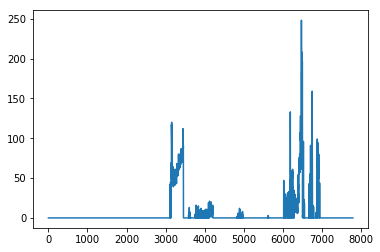

temp_c


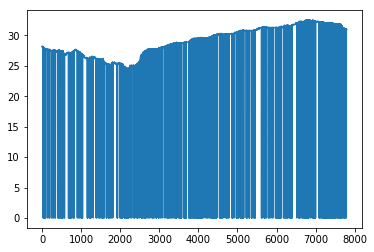

rh_percent


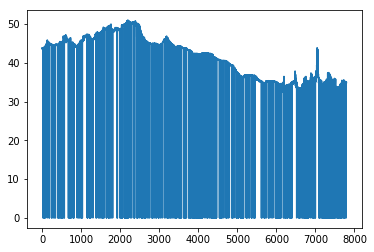

light_lux


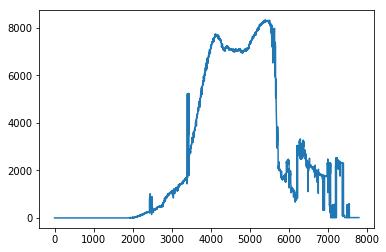

co2eq_ppm


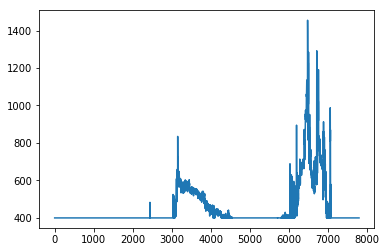

dist_mm


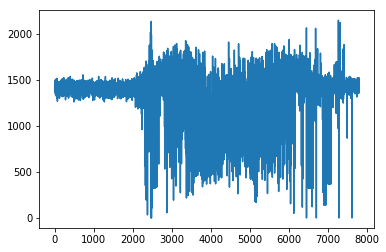

co2eq_base


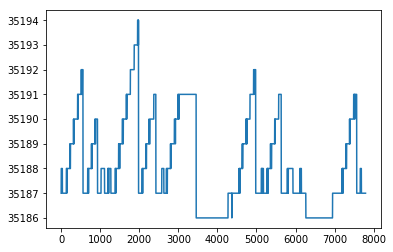

tvoc_base


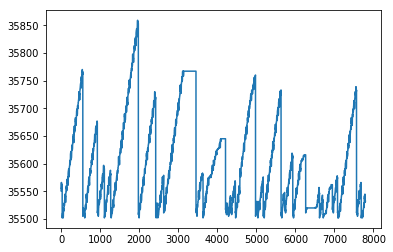

In [5]:
#fig, ax = plt.subplots()
#plt.plot(vals[0:1000])
#plt.show()
#X, Y = str_time, vals

for measure in new_measures:
    print(measure)
    plt.plot(new_measures[measure])
    plt.show()

In [ ]:
def plot(dfs):
    for sensor in dfs:
        print(sensor)
        for m, measure in enumerate(self.measures):
            print(measure)
            for date in self.all_dfs[sensor]:
                print(date)
                df = self.all_dfs[sensor][date]
                df2 = df.loc[df['date'] == date, ['time-hr-min-sec', measure]]                
                for row in df2.iterrows():
                    if row[1][1] is None:
                        row[1][1] = np.NaN
                if measure in self.limits:        
                    low, high = self.limits[measure][0], self.limits[measure][1]        
                    if measure  == 'temp_c':
                        df2.loc[(df2.temp_c <= low), 'temp_c'] = np.NaN
                        df2.loc[df2.temp_c > high, 'temp_c'] = np.NaN
                    if measure == 'rh_percent':
                        df2.loc[df2.rh_percent <= low, 'rh_percent'] = np.NaN
                        df2.loc[df2.rh_percent > high, 'rh_percent'] = np.NaN
                    if measure == 'tvoc_ppb':
                        df2.loc[df2.tvoc_ppb > high, 'tvoc_ppb'] = np.NaN                                            
                    if measure == 'co2eq_ppm':
                        df2.loc[df2.co2eq_ppm < low, 'co2eq_ppm'] = np.NaN
                        df2.loc[df2.co2eq_ppm > high, 'co2eq_ppm'] = np.NaN
                    if measure == 'abs_humid':
                        df2.loc[df2.abs_humid < low, 'abs_humid'] = np.NaN
                        df2.loc[df2.abs_humid > high, 'abs_humid'] = np.NaN

                try:                
                    fig, ax = plt.subplots(figsize = (8,5))

                    ax.plot(df2[measure], color = self.colors[m])
                    unit = self.units[measure]
                    name = self.names[measure]
                    ax.set_ylabel(unit)

                    #title = '{} : {}, {}'.format(name, sensor, date)
                    title = str(name + ', ' + sensor + ' : ' + date)
                    #fname = '{}_{}_{}'.format(date_sensor_name)      
                    fname = os.path.join('/Users/maggie/Desktop',str(date +'_'+ sensor +'_'+ measure +'_after.png'))
                    print(fname)
                    ax.set_xlabel('Hour')
                    plt.title(title)


                    myFmt = mdates.DateFormatter('%H')
                    ax.xaxis.set_major_formatter(myFmt) 
                    fig.autofmt_xdate()

                    plt.savefig(fname)

                    plt.show()
                except:
                    pass


